In [1]:
#importing library
import pandas as pd


In [2]:
#Loading the datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

print("Train data shape: ", train_df.shape)
print("Test data shape: ", test_df.shape)

Train data shape:  (1296675, 23)
Test data shape:  (555719, 23)


In [3]:
#Combining both dataset for preprocessing
df = pd.concat([train_df, test_df],ignore_index=True)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
#Droppping unnecessary cols for better performance
df = df.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','merchant','first','last','street','city','state','zip','lat','long','city_pop','trans_num','unix_time','merch_lat','merch_long'])

df.columns.tolist()

['category', 'amt', 'gender', 'job', 'dob', 'is_fraud']

In [5]:
#Creating age from dob col
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365

df = df.drop('dob',axis=1)
df.head()

,category,amt,gender,job,is_fraud,age
0,misc_net,4.97,F,"Psychologist, counselling",0,37
1,grocery_pos,107.23,F,Special educational needs teacher,0,47
2,entertainment,220.11,M,Nature conservation officer,0,63
3,gas_transport,45.00,M,Patent attorney,0,58
4,misc_pos,41.96,M,Dance movement psychotherapist,0,39


In [6]:
#Finiding the unique number of values for the job and category cols

print(df['category'].unique())
print(df['job'].unique())

['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furnitu

In [7]:
#Checking the dataset after removing the additional columns
df.columns.tolist()

['category', 'amt', 'gender', 'job', 'is_fraud', 'age']

In [8]:
#Defining the cols based on its category for encoding

categorical_cols = ['category','job']
cat_binary = ['gender']
numerical_cols = ['amt','age']


In [9]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),
        ('cat_bin',OrdinalEncoder(),cat_binary),
        ('num',StandardScaler(),numerical_cols)

    ],remainder='drop'
)

In [10]:
preprocessor

,transformers,"[('cat', ...), ('cat_bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [11]:
X = df.drop(columns=['is_fraud'],axis = 1)
y = df['is_fraud']

In [12]:
#Splitting dataset based on predictor and target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (1296675, 5)
X_test shape: (555719, 5)
y_train shape: (1296675,)
y_test shape: (555719,)


In [13]:
#Standardization
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [16]:
#Balancing training data using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res ,y_train_res = sm.fit_resample(X_train_transformed, y_train)

print("Before SMOTE: ",y_train.value_counts())
print("After SMOTE: ",y_train_res.value_counts())

Before SMOTE:  is_fraud
0    1289919
1       6756
Name: count, dtype: int64
After SMOTE:  is_fraud
0    1289919
1    1289919
Name: count, dtype: int64


In [17]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=5, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=10, min_samples_leaf=5, class_weight='balanced', n_jobs=-1, random_state=42)




In [18]:
#Fitting the logistic regression model based on balanced data
lr.fit(X_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
#Fitting Decision Tree model on balanced data
dt.fit(X_train_res, y_train_res)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [21]:
#Fitting Random Forest based on balalnced data
rf.fit(X_train_res, y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,12
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#Predicting output from the models
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
y_pred_rf = rf.predict(X_test_transformed)

In [23]:
#Evaluation metrics for each model
from sklearn.metrics import accuracy_score,f1_score,classification_report

def evaluate_model(name,y_true,y_pred):
    print(f"\n{name} Evaluation: ")
    print(f"Accuracy Score:{accuracy_score(y_true,y_pred):.4f}")
    print(f"F1 Score:{f1_score(y_true,y_pred,average='binary'):4f}")
    print(f"Classification Report:{classification_report(y_true,y_pred,digits=4)}")

In [24]:
evaluate_model('Logistic Regression',y_test,y_pred_lr)


Logistic Regression Evaluation: 
Accuracy Score:0.8911
F1 Score:0.069957
Classification Report:              precision    recall  f1-score   support

           0     0.9987    0.8917    0.9422    552824
           1     0.0366    0.7862    0.0700      2895

    accuracy                         0.8911    555719
   macro avg     0.5177    0.8389    0.5061    555719
weighted avg     0.9937    0.8911    0.9376    555719



In [25]:
evaluate_model('Decision Tree',y_test,y_pred_dt)


Decision Tree Evaluation: 
Accuracy Score:0.9565
F1 Score:0.186989
Classification Report:              precision    recall  f1-score   support

           0     0.9998    0.9565    0.9776    552824
           1     0.1036    0.9606    0.1870      2895

    accuracy                         0.9565    555719
   macro avg     0.5517    0.9585    0.5823    555719
weighted avg     0.9951    0.9565    0.9735    555719



In [26]:
evaluate_model('Random forest classifier',y_test,y_pred_rf)


Random forest classifier Evaluation: 
Accuracy Score:0.9784
F1 Score:0.267318
Classification Report:              precision    recall  f1-score   support

           0     0.9987    0.9796    0.9890    552824
           1     0.1623    0.7565    0.2673      2895

    accuracy                         0.9784    555719
   macro avg     0.5805    0.8680    0.6282    555719
weighted avg     0.9943    0.9784    0.9853    555719



In [27]:
#Determining the unique predictions
import numpy as np

print("Unique predictions - Logistic Regression:", np.unique(y_pred_lr))
print("Unique predictions - Decision Tree:", np.unique(y_pred_dt))
print("Unique predictions - Random Forest:", np.unique(y_pred_rf))


Unique predictions - Logistic Regression: [0 1]
Unique predictions - Decision Tree: [0 1]
Unique predictions - Random Forest: [0 1]


In [28]:
print(y_test.value_counts())


is_fraud
0    552824
1      2895
Name: count, dtype: int64


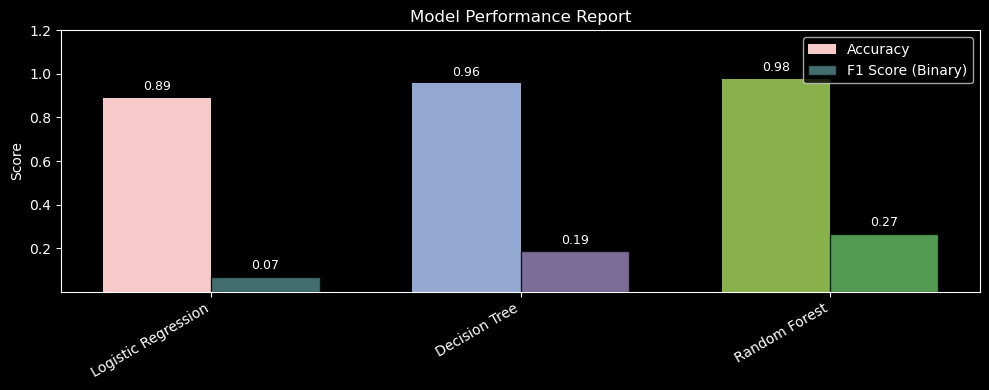

In [29]:
#Model performance comparison
import matplotlib.pyplot as plt

colors_acc = {
    'Logistic Regression':'#F7CAC9',
    'Decision Tree':'#92A8D1',
    'Random Forest':'#88B04B'
}

colors_f1 = {
    'Logistic Regression':'#5F9EA0',
    'Decision Tree':'#B19CD9',
    'Random Forest':'#77DD77'
}


models =[ 'Logistic Regression','Decision Tree', 'Random Forest']

accuracy      = [0.8911,0.9565,0.9784]
f1_score_each = [0.069957,0.186989,0.267318]
x = np.arange(len(models))


bar_width =0.35
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,4))

bars_acc = ax.bar(
    x - bar_width/2,
    accuracy,
    width=bar_width,
    label='Accuracy',
    color=[colors_acc[m] for m in models]
)

bars_f1 = ax.bar(
    x + bar_width/2,
    f1_score_each,
    width=bar_width,
    label='F1 Score (Binary)',
    edgecolor='black',
    alpha=0.7,
    color=[colors_f1[m] for m in models]
)

# Adding value labels
ax.bar_label(bars_acc, labels=[f"{v:.2f}" for v in accuracy], padding=3, fontsize=9)
ax.bar_label(bars_f1, labels=[f"{v:.2f}" for v in f1_score_each], padding=3, fontsize=9)

# Customizing chart
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha='right')
ax.set_ylabel('Score')
ax.set_ylim(0.001, 1.2)
ax.set_title('Model Performance Report')
ax.legend()

plt.tight_layout()
plt.show()




In [30]:
# View actual fraud samples from the test set
fraud_indices = y_test[y_test == 1].index[:5]  # first 5 fraud samples
fraud_samples = X_test.loc[fraud_indices]

# Transform and predict
fraud_transformed = preprocessor.transform(fraud_samples)
fraud_pred = dt.predict(fraud_transformed)

fraud_proba = rf.predict_proba(fraud_transformed)[:, 1]
for i in range(len(fraud_samples)):
    print(f"Transaction {i+1}: Actual = 1, Predicted = {fraud_pred[i]} (Fraud Probability: {fraud_proba[i]:.2f})")


Transaction 1: Actual = 1, Predicted = 1 (Fraud Probability: 0.30)
Transaction 2: Actual = 1, Predicted = 1 (Fraud Probability: 0.76)
Transaction 3: Actual = 1, Predicted = 1 (Fraud Probability: 0.76)
Transaction 4: Actual = 1, Predicted = 1 (Fraud Probability: 0.70)
Transaction 5: Actual = 1, Predicted = 1 (Fraud Probability: 0.77)


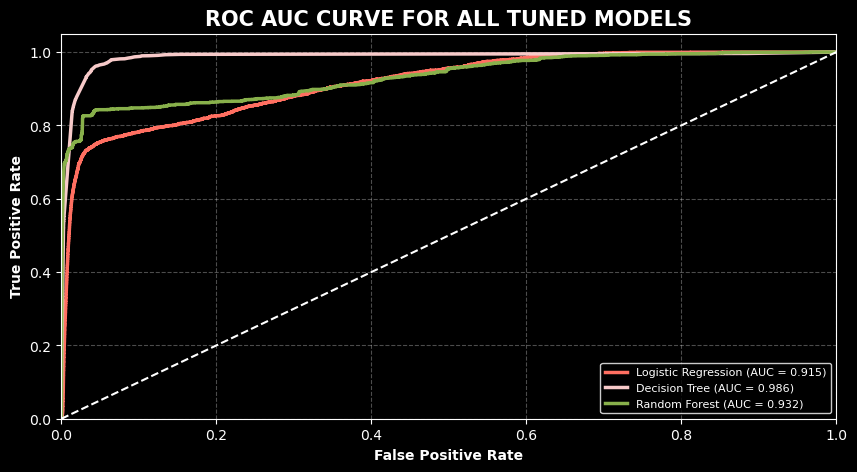

In [31]:
#ROC AUC CURVE:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models_stratified = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf
}

# colors for plotting
colors = {
    'Logistic Regression': '#FF6F61',
    'Decision Tree': '#F7CAC9',
    'Random Forest': '#88B04B'
}

plt.style.use('dark_background')
plt.figure(figsize=(10,5))

for name, model in models_stratified.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_transformed)[:, 1]

    # computing ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # plotting curve
    plt.plot(fpr, tpr, color=colors[name], lw=2.5,
             label=f"{name} (AUC = {roc_auc:.3f})")

# reference diagonal line
plt.plot([0, 1], [0, 1], 'w--', lw=1.5)

# formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=10, fontweight='bold')
plt.title("ROC AUC CURVE FOR ALL TUNED MODELS", fontsize=15, fontweight='bold')
plt.legend(fontsize=8, loc='lower right', frameon=True,
           facecolor='black', edgecolor='white')
plt.grid(alpha=0.3,linestyle='--')

plt.show()


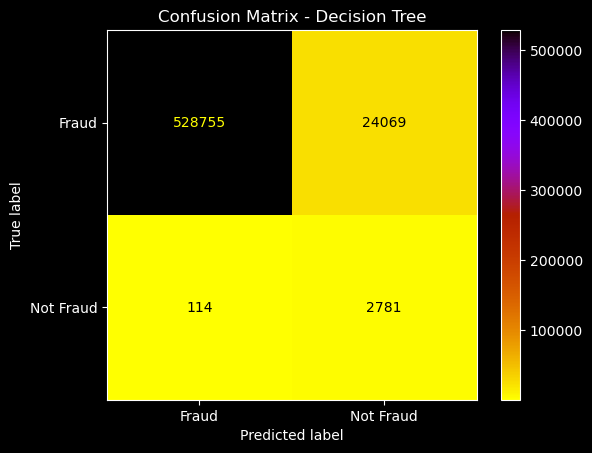

In [32]:
#Confusion Matrix for the best model :Decision Tree

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


cm = confusion_matrix(y_test,y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Fraud','Not Fraud'])
disp.plot(cmap='gnuplot_r')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
